## Collatz alpha experiments

In [13]:
"""
This experimental notebook analyses alphas (number of divisions by two) 
of randomly generated Collatz sequences.
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
import random as rnd
from math import log2
import matplotlib.pyplot as plt
import pandas as pd
from collatz import generator as gen
from collatz import commons as com

# Configuration
MAX_VALUE = 101
K_FACTOR = 3
MAX_ITERATIONS = 100
LOG_MODE = None
PRINT_TABLE = True

START_VALUE = rnd.randint(1, MAX_VALUE)

if START_VALUE % 2 == 0:
    START_VALUE = START_VALUE + 1

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Create a collatz sequence and analyse it
analysis_frame = gen.generate_odd_collatz_sequence(
    start_value=START_VALUE, k=K_FACTOR, max_iterations=MAX_ITERATIONS)

# Drop last row if sequences has ended with 1
if len(analysis_frame) > 1:
    analysis_frame = analysis_frame[:-1]

# Derive new fields
analysis_frame["v1"] = START_VALUE
analysis_frame["n"] = analysis_frame.index + 1
analysis_frame["beta"] = 1 + 1 / (K_FACTOR * analysis_frame["collatz"]) 

analysis_frame["alpha_i"] = analysis_frame["next_collatz"].apply(com.trailing_zeros)
analysis_frame["alpha_i"] = analysis_frame["alpha_i"].astype("int64")
analysis_frame["alpha_i_max"] = log2(K_FACTOR) + analysis_frame["collatz"].apply(log2)
analysis_frame["alpha_i_max"] += (1 + 1/(K_FACTOR * analysis_frame["collatz"])).apply(log2)
# Round result here to avoid loss of precision errors
analysis_frame["alpha_i_max"] = analysis_frame["alpha_i_max"].round(9)
analysis_frame["alpha_sum"] = analysis_frame["alpha_i"].cumsum()
analysis_frame["alpha_pred"] = (log2(K_FACTOR) * analysis_frame["n"]).astype('int64') + 1
analysis_frame["alpha_max"] = \
    log2(START_VALUE) + (analysis_frame["n"] * log2(K_FACTOR))
analysis_frame["alpha_max"] = analysis_frame["alpha_max"].astype('int64') + 1

analysis_frame["bin_str"] = analysis_frame["collatz"].apply(com.to_binary)

# Possibly set log mode
if LOG_MODE:
    analysis_frame["v1"] = analysis_frame["v1"].apply(LOG_MODE)
    analysis_frame["collatz"] = analysis_frame["collatz"].apply(LOG_MODE)
    analysis_frame["next_odd"] = analysis_frame["next_odd"].apply(LOG_MODE)
    
# Validate alpha max & alpha pred
final_alpha = analysis_frame["alpha_sum"].max()
final_alpha_max = analysis_frame["alpha_max"].max()

alpha_max_valid = final_alpha == final_alpha_max
alpha_i_max_valid = int((analysis_frame["alpha_i"] <= analysis_frame["alpha_i_max"]).sum())

alphas_valid = alpha_max_valid and alpha_i_max_valid

# Print results
print_frame = analysis_frame[[
    "n", "v1", "collatz", "next_odd",
    "alpha_i", "alpha_i_max", "alpha_sum", "alpha_pred", 
    "alpha_max", "bin_str"]]

print_frame.columns = [
    "n","v1", "vi", "vi+1",
    "a_i", "a_i_max", "a_sum", "a_pred", "a_max",
    "bin_str"]

# print_frame = print_frame.sort_values(by=['vi'])
print_frame = print_frame.reset_index(drop=True)

print("Start value:", START_VALUE, 
      " K:", K_FACTOR, 
       "Alphas valid:", alpha_max_valid, "\n")

if PRINT_TABLE:
    print(print_frame.to_string(index=False), "\n")


Start value: 27  K: 3 Alphas valid: True 

  n  v1    vi  vi+1  a_i    a_i_max  a_sum  a_pred  a_max       bin_str
  1  27    27    41    1   6.357552      1       2      7         11011
  2  27    41    31    2   6.954196      3       4      8        101001
  3  27    31    47    1   6.554589      4       5     10         11111
  4  27    47    71    1   7.149747      5       7     12        101111
  5  27    71   107    1   7.741467      6       8     13       1000111
  6  27   107   161    1   8.330917      7      10     15       1101011
  7  27   161   121    2   8.918863      9      12     16      10100001
  8  27   121    91    2   8.507795     11      13     18       1111001
  9  27    91   137    1   8.098032     12      15     20       1011011
 10  27   137   103    2   8.686501     14      16     21      10001001
 11  27   103   155    1   8.276124     15      18     23       1100111
 12  27   155   233    1   8.864186     16      20     24      10011011
 13  27   233   175  

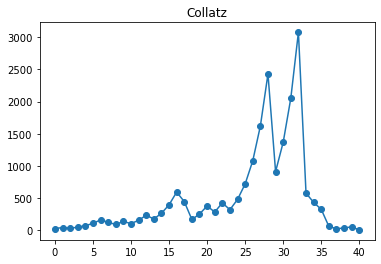

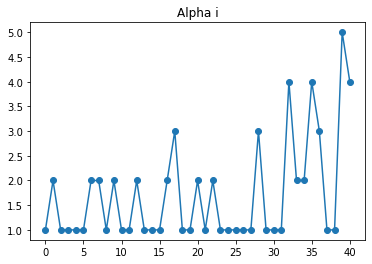

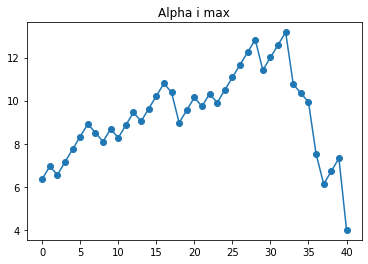

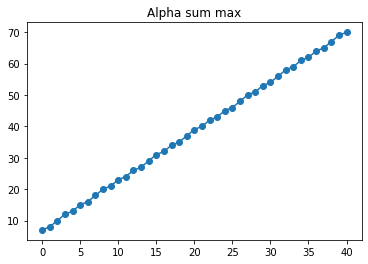

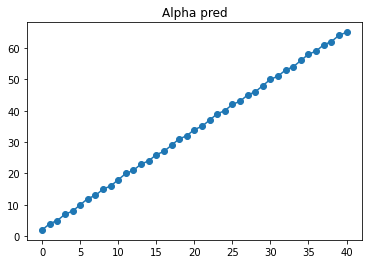

In [14]:
# Plot results
plt.figure()
plt.title("Collatz")
plt.plot(print_frame["vi"],  "o-")


plt.figure()
plt.title("Alpha i")
plt.plot(print_frame["a_i"],  "o-")

plt.figure()
plt.title("Alpha i max")
plt.plot(print_frame["a_i_max"],  "o-")

plt.figure()
plt.title("Alpha sum max")
plt.plot(print_frame["a_max"],  "o-")

plt.figure()
plt.title("Alpha pred")
plt.plot(print_frame["a_pred"],  "o-")